# Reading EM Data from a Real SDR Hardware

In this Jupyter-Notebook, we will follow much similar steps as the previous one. However this time, we are going to capture real EM data from SDR devices.

## RTL-SDR Hardware

### 1. Starting the GRC Script with RTL-SDR Hardware

- Open the GRC flowgraph file called **2.data-source.grc**  from the **GRC-Scripts** folder using GNURadio Companion software. We have two data sources there.
- Enable the **RTL-SDR Source** block which we need to capture data from RTL-SDR device.
- Disable the **osmocom source** block which is needed only when we are capturing data using HackRF.
- Plug in the RTL-SDR dongle into the USB port of the computer.
- Click play button to start the script running. Leave it running and continue the rest of this Jupyter-Notebook.

![alt text](./images/2.data-source-rtl-sdr.png "Screenshot of 2.data-source.grc")

### 2. Importing required libraries

In order to capture the data coming from ZMQ socket of the GRC flowgraph into our Python programs, we need some libraries. Let's import them now. We are basically using three important libraries. **matplotlib**  library is useful to plot graphs using data. The **NumPy** library helps us to process data on Python. Then, **emvincelib** is a small library we have written and included in **EMvince** framework. It provides the API functions to capture data coming from the ZMQ socket and manipulate as we wish.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from emvincelib import iq, ml, stat

%matplotlib inline

### 3. Setting the configurations

The **emvince** library has a variable called **sampleRate** that holds the sampling rate of our data. That means, how many data samples are captured per second. If you look at the flowgraph, you can see that the sampling rate is set to 3MHz there. That means, our Python codes should handle the data in the same rate. So, let's set the sampling rate as follows. **3e6** means, 3 multiplied by 10 to the power 6. That means 3MHz. 

In [12]:
iq.sampleRate = 3e6

### 4. Reading data from SDR device

Now, it's time to capture some data. First of all, we create a socket by using the function **startZMQClient()** that returns the socket object.Then, we use **genSingleTraceFile()** function to capture data and save into a file. The parameters are the socket object, the path to a directory where the data file should be saved, name for the datafile, sample rate and finally the time duration of sampling in milliseconds. We have set the time duration to 10 milliseconds in this particular case. Finally, we close the ZMQ socket connection by calling **stopZMQClient()** function. The captured data are stored in the file as a NumPy array and the resulting file name would be **em-data-file.py**.

In [13]:
zmqSocket = iq.startZMQClient()

iq.genSingleTraceFile(zmqSocket, "./data", "em-data-file", sampleRate=3e6, windowSize=10)

iq.stopZMQClient(zmqSocket)

I am consumer #5026
Stopping client...


1

### 5. How big the file is?

There can be situations where we are not sure about the EM data file we are given. In such cases, we can use the function **getTimeDuration()** to check the time duration of data stored in a particular file. The first argument to the function is the file name with path. The second parameter is the file type we are dealing with. In this particular case, the file type is **npy** that represents NumPy file type. There are other file types that we will come across in different situations. Since we captured data for 10 milliseconds (0.01 seconds), we should receive 0.01 seconds as the answer.

In [14]:
duration = iq.getTimeDuration("./data/em-data-file.npy", fileType="npy")

print("Time duration of the file: " + str(duration) + " seconds")

Time duration of the file: 0.01 seconds


### 6. How to read saved data back from a NumPy file?

In order to do anything with these data, we need to load it back to memory. We can do that by using the **load()** function in NumPy library. Sometimes, when the data file is too large, we may run out of memory capacity to load the data and can slowdown the computer. Therefore, the parameter **mmap_mode='r'** specifies that the data file should be memory mapped. That means, the file will remain in the hard disk but will be accessed as it is in memory.

Once loaded the databack and assigned to the **data** variable, we can check how many samples we have there by using **len()** function. Since our sampling rate was 3MHz and the sampling duration was 10milliseconds, we should have 30000 samples.

sampling rate x sampling duration = 3x10^6 x 10x10^-3 = 30000

In [15]:
data= np.load("./data/em-data-file.npy", mmap_mode='r')

length = len(data)

print("Number of samples in NumPy data: " + str(length))

Number of samples in NumPy data: 30000


### 7. Plotting data

It's time to visualize our data using various plots. The **emvince** library provide multiple plot types such as waveform, scatter, FFT, PSD, and spectrogram. Let's try each of them separately. 

#### Waveform Plot

A waveform graph has samples in x-axis while the amplitude of each sample is shown in y-axis.

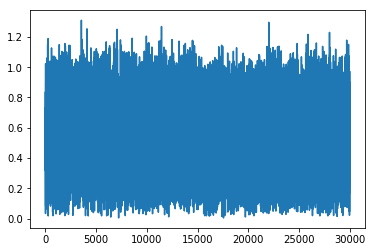

1

In [16]:
iq.plotWaveform(data)

#### Scatter Plot

An In-phase and Quadrature (I-Q) data sample has two components. A scatter plot visualize each sample by showing one component of the sample in x-axis and the other component of the sample in y-axis.

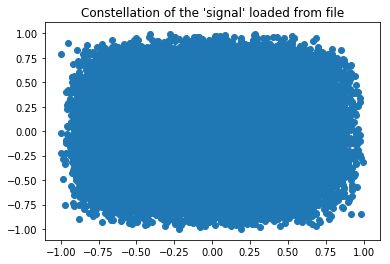

1

In [17]:
iq.plotScatter(data)

#### FFT Plot

Fast Fourier Transform (FFT) is an algorithm to convert a time domain signal into frequency domain. In an FFT plot, the x-axis represents the frequencies of the signal while the y-xis represents the amplitude of each frequency component. If you look at our GRC flow graph again, you will see that in this particular data file, we have only a signal of 2kHz frequency. That means, we should see a peak at 2kHz in the FFT plot. 

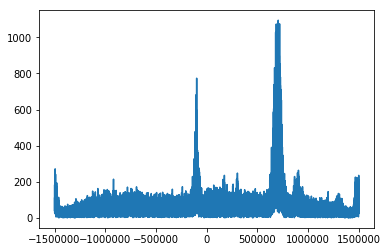

1

In [18]:
iq.plotFFT(data)

#### PSD Plot

Power Spectral Density (PSD) represents the power of each frequency component in a signal. The x-axis represents the frequencies while the y-axis represents the power in decibel for each frequency hertz. Since we have a signal of 2kHz frequency, we should see a higher power peak at that frequency.

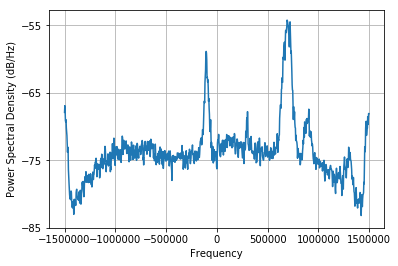

1

In [19]:
iq.plotPSD(data)

#### Spectrogram Plot

Spectrogram of a signal is a very powerful and an informative visualization. On the x-axis we have time steps of the signal's short-term Fourier Transform (STFT). The y-axis represents the frequency components of the signal. Meanwhile, colour intensity at each point in the graph represents the amplitude of a particular frequency at a particular time step. Since we have a 2kHz signal in our data, we can see a bright coloured line at 2kHz frequency across the time steps.

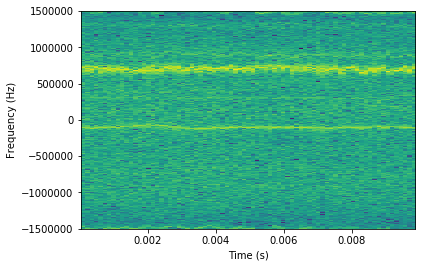

1

In [20]:
iq.plotSpectrogram(data)

### 8. Ending remarks

Now that we are done with this Jupyter-Notebook, let's stop the GNURadio Companion script that you started at the begining.

## HackRF Hardware

### 1. Starting the GRC Script with HackRF Hardware

- Open the GRC flowgraph file called **2.data-source.grc**  from the **GRC-Scripts** folder using GNURadio Companion software. We have two data sources there.
- Disable the **RTL-SDR Source** block which we need only when capturing data from RTL-SDR device.
- Enable the **osmocom source** block which we are going to use to capturing data using HackRF.
- Plug in the HackRF device into the USB port of the computer.
- Click play button to start the script running. Leave it running and continue the rest of this Jupyter-Notebook.

![alt text](./images/2.data-source-hackrf.png "Screenshot of 2.data-source.grc")

### 2. Importing required libraries

In order to capture the data coming from ZMQ socket of the GRC flowgraph into our Python programs, we need some libraries. Let's import them now. We are basically using three important libraries. **matplotlib**  library is useful to plot graphs using data. The **NumPy** library helps us to process data on Python. Then, **emvincelib** is a small library we have written and included in **EMvince** framework. It provides the API functions to capture data coming from the ZMQ socket and manipulate as we wish.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from emvincelib import iq, ml, stat

%matplotlib inline

### 3. Setting the configurations

The **emvince** library has a variable called **sampleRate** that holds the sampling rate of our data. That means, how many data samples are captured per second. If you look at the flowgraph, you can see that the sampling rate is set to 3MHz there. That means, our Python codes should handle the data in the same rate. So, let's set the sampling rate as follows. **3e6** means, 3 multiplied by 10 to the power 6. That means 3MHz. 

In [2]:
iq.sampleRate = 3e6

### 4. Reading data from SDR device

Now, it's time to capture some data. First of all, we create a socket by using the function **startZMQClient()** that returns the socket object.Then, we use **genSingleTraceFile()** function to capture data and save into a file. The parameters are the socket object, the path to a directory where the data file should be saved, name for the datafile, sample rate and finally the time duration of sampling in milliseconds. We have set the time duration to 10 milliseconds in this particular case. Finally, we close the ZMQ socket connection by calling **stopZMQClient()** function. The captured data are stored in the file as a NumPy array and the resulting file name would be **em-data-file.py**.

In [3]:
zmqSocket = iq.startZMQClient()

iq.genSingleTraceFile(zmqSocket, "./data", "em-data-file", sampleRate=3e6, windowSize=10)

iq.stopZMQClient(zmqSocket)

I am consumer #3531
Stopping client...


1

### 5. How big the file is?

There can be situations where we are not sure about the EM data file we are given. In such cases, we can use the function **getTimeDuration()** to check the time duration of data stored in a particular file. The first argument to the function is the file name with path. The second parameter is the file type we are dealing with. In this particular case, the file type is **npy** that represents NumPy file type. There are other file types that we will come across in different situations. Since we captured data for 10 milliseconds (0.01 seconds), we should receive 0.01 seconds as the answer.

In [4]:
duration = iq.getTimeDuration("./data/em-data-file.npy", fileType="npy")

print("Time duration of the file: " + str(duration) + " seconds")

Time duration of the file: 0.01 seconds


### 6. How to read saved data back from a NumPy file?

In order to do anything with these data, we need to load it back to memory. We can do that by using the **load()** function in NumPy library. Sometimes, when the data file is too large, we may run out of memory capacity to load the data and can slowdown the computer. Therefore, the parameter **mmap_mode='r'** specifies that the data file should be memory mapped. That means, the file will remain in the hard disk but will be accessed as it is in memory.

Once loaded the databack and assigned to the **data** variable, we can check how many samples we have there by using **len()** function. Since our sampling rate was 3MHz and the sampling duration was 10milliseconds, we should have 30000 samples.

sampling rate x sampling duration = 3x10^6 x 10x10^-3 = 30000

In [5]:
data= np.load("./data/em-data-file.npy", mmap_mode='r')

length = len(data)

print("Number of samples in NumPy data: " + str(length))

Number of samples in NumPy data: 30000


### 7. Plotting data

It's time to visualize our data using various plots. The **emvince** library provide multiple plot types such as waveform, scatter, FFT, PSD, and spectrogram. Let's try each of them separately. 

#### Waveform Plot

A waveform graph has samples in x-axis while the amplitude of each sample is shown in y-axis.

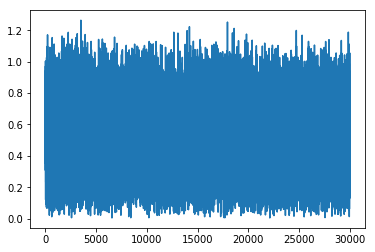

1

In [6]:
iq.plotWaveform(data)

#### Scatter Plot

An In-phase and Quadrature (I-Q) data sample has two components. A scatter plot visualize each sample by showing one component of the sample in x-axis and the other component of the sample in y-axis.

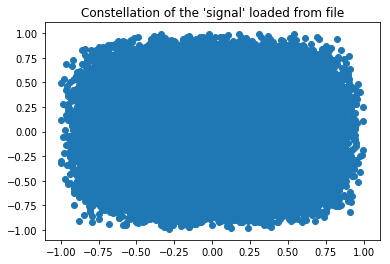

1

In [7]:
iq.plotScatter(data)

#### FFT Plot

Fast Fourier Transform (FFT) is an algorithm to convert a time domain signal into frequency domain. In an FFT plot, the x-axis represents the frequencies of the signal while the y-xis represents the amplitude of each frequency component. If you look at our GRC flow graph again, you will see that in this particular data file, we have only a signal of 2kHz frequency. That means, we should see a peak at 2kHz in the FFT plot. 

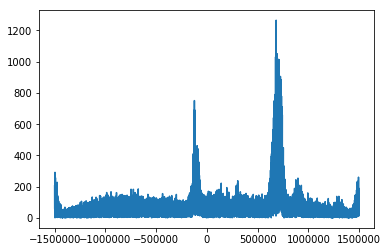

1

In [8]:
iq.plotFFT(data)

#### PSD Plot

Power Spectral Density (PSD) represents the power of each frequency component in a signal. The x-axis represents the frequencies while the y-axis represents the power in decibel for each frequency hertz. Since we have a signal of 2kHz frequency, we should see a higher power peak at that frequency.

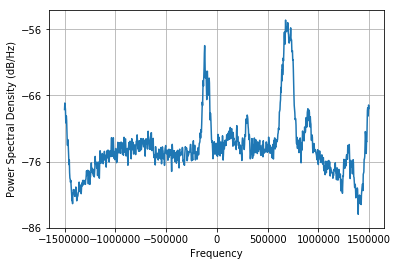

1

In [9]:
iq.plotPSD(data)

#### Spectrogram Plot

Spectrogram of a signal is a very powerful and an informative visualization. On the x-axis we have time steps of the signal's short-term Fourier Transform (STFT). The y-axis represents the frequency components of the signal. Meanwhile, colour intensity at each point in the graph represents the amplitude of a particular frequency at a particular time step. Since we have a 2kHz signal in our data, we can see a bright coloured line at 2kHz frequency across the time steps.

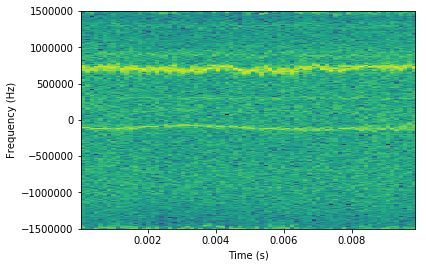

1

In [10]:
iq.plotSpectrogram(data)

### 8. Ending remarks

Now that we are done with this Jupyter-Notebook, let's stop the GNURadio Companion script that you started at the begining.